# RNN by Tensorflow

### 데이터 준비

In [3]:
VOCAB_SIZE = 300
SEQ_LEN = 100

In [4]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=VOCAB_SIZE)
train_input.shape, train_target.shape, test_input.shape, test_target.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((25000,), (25000,), (25000,), (25000,))

In [5]:
train_input, test_input = train_input[:10000], test_input[:5000]
train_target, test_target = train_target[:10000], test_target[:5000]
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((10000,), (10000,), (5000,), (5000,))

In [6]:
# padding 처리 (동일한 길이)
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=SEQ_LEN)
test_seq = pad_sequences(test_input, maxlen=SEQ_LEN)

train_seq.shape, test_seq.shape

((10000, 100), (5000, 100))

In [7]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

train_onehot = to_categorical(train_seq)
test_onehot = to_categorical(test_seq)

train_onehot.shape, test_onehot.shape

((10000, 100, 300), (5000, 100, 300))

### 모델 준비 및 학습

In [8]:
from tensorflow.keras import models, layers, callbacks, optimizers

input = layers.Input(shape=(SEQ_LEN,VOCAB_SIZE))
x = layers.SimpleRNN(units=8)(input)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(input, output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 300)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - Accuracy: 0.4989 - loss: 0.7008 - val_Accuracy: 0.5115 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - Accuracy: 0.5310 - loss: 0.6904 - val_Accuracy: 0.5140 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - Accuracy: 0.5607 - loss: 0.6848 - val_Accuracy: 0.5135 - val_loss: 0.6902 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - Accuracy: 0.5703 - loss: 0.6789 - val_Accuracy: 0.5220 - val_loss: 0.6898 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - Accuracy: 0.5895 - loss: 0.6687 - val_Accuracy: 0.5240 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - Accuracy: 0.6101 - loss: 0.6610 - val_Accuracy: 0.5565 - val_loss: 0.6780 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - Accuracy: 0.6423 - l

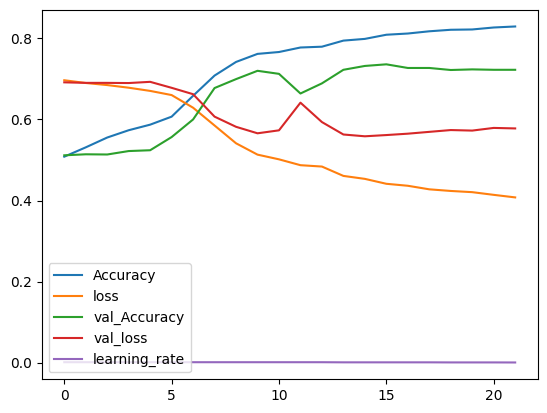

In [9]:
# 컴파일 및 학습
import pandas as pd
import matplotlib.pyplot as plt

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['Accuracy'])

early_stopping_cb = callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)
reduce_lr_on_plateau_cb = callbacks.ReduceLROnPlateau(patience=3, factor=0.7, verbose=1)

history = model.fit(
    train_onehot,
    train_target,
    epochs=100,
    batch_size=65,
    validation_split=0.2,
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb]
)

history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

In [10]:
loss, accuracy = model.evaluate(test_onehot, test_target)
loss, accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - Accuracy: 0.7268 - loss: 0.5849


(0.5890883207321167, 0.7175999879837036)